<a href="https://colab.research.google.com/github/kushbajpai/Image-Generation-Models/blob/main/Working_with_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### ** Working with Images in Python**

This notebook provides a practical introduction to handling and manipulating images using common Python libraries like `Pillow`, `Matplotlib`, and `NumPy`. We will cover essential tasks such as:

1.  Loading and displaying images.
2.  Understanding image data as a NumPy array.
3.  Basic image manipulations (resizing, cropping, rotating).
4.  Applying filters and color transformations.
5.  Saving images.

#### **1. Setup and Imports**

First, let's install `Pillow` and import all the necessary libraries. `Pillow` is an image processing library, `Matplotlib` is for plotting, and `NumPy` is for numerical operations on the image data.

In [ ]:
# Install Pillow if it's not already available (Colab usually has it)
!pip install Pillow

# Import the necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

#### **2. Loading an Image**

You can load an image from a local file or directly from a URL. For this example, we'll load one from a URL to make the notebook self-contained.

Image format: JPEG
Image mode: RGB
Image size (width, height): (800, 600)


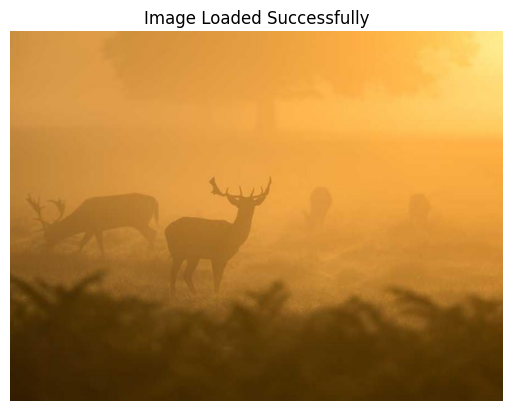

In [ ]:
# --- Use a different, more reliable image URL ---
# This URL from Lorem Picsum returns a high-quality, raw JPEG image
image_url = 'https://picsum.photos/800/600'

# Send a request to get the image content
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Load the image from the in-memory byte stream
    img = Image.open(BytesIO(response.content))

    # Display some basic information about the image
    print(f"Image format: {img.format}")
    print(f"Image mode: {img.mode}")
    print(f"Image size (width, height): {img.size}")

    # Display the image
    plt.imshow(img)
    plt.title("Image Loaded Successfully")
    plt.axis('off')
    plt.show()

else:
    print(f"Failed to retrieve image. Status code: {response.status_code}")
    print("Please check the URL or your network connection.")

#### **3. Displaying the Image**

We'll use `Matplotlib` to display the image. This is a common practice in data science and machine learning to visualize data.

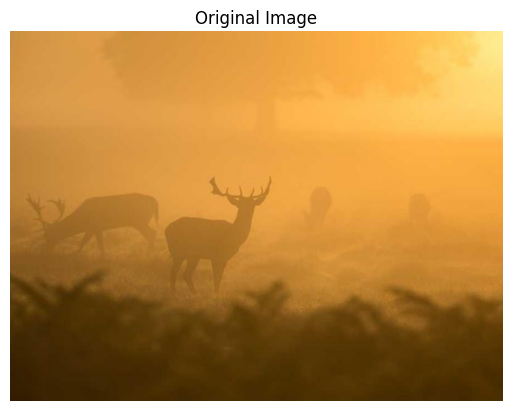

In [ ]:
# Display the original image using Matplotlib
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')  # Turn off the axes for a cleaner look
plt.show()

#### **4. Image as a NumPy Array**

An image is just a grid of numbers (pixels). In a computer, we represent this as a `NumPy` array. Understanding this is crucial for more advanced image processing tasks.

  * For an RGB image, the array will have dimensions `(height, width, 3)`, where `3` represents the red, green, and blue channels.
  * For a grayscale image, the dimensions will be `(height, width)`.

<!-- end list -->

In [ ]:
# Convert the PIL Image object to a NumPy array
img_array = np.array(img)

# Print the shape and data type of the array
print(f"Shape of the NumPy array: {img_array.shape}")
print(f"Data type of the array: {img_array.dtype}")

# Display a small section of the pixel values to see the data
print("\nFirst 5x5 pixels of the Red channel:")
print(img_array[:5, :5, 0])

Shape of the NumPy array: (600, 800, 3)
Data type of the array: uint8

First 5x5 pixels of the Red channel:
[[202 202 202 202 202]
 [202 202 202 202 202]
 [202 202 202 202 202]
 [202 202 202 202 202]
 [202 202 202 202 202]]


#### **5. Basic Image Manipulations**

`Pillow` provides simple methods for common operations like resizing, cropping, and rotating.

##### **a. Resizing**

Resizing changes the dimensions of the image.

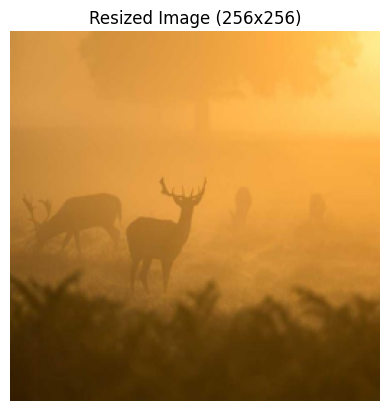

In [ ]:
# Resize the image to 256x256 pixels
resized_img = img.resize((256, 256))

plt.imshow(resized_img)
plt.title("Resized Image (256x256)")
plt.axis('off')
plt.show()

##### **b. Cropping**

Cropping extracts a rectangular region from the image. The `.crop()` method takes a tuple `(left, upper, right, lower)` as arguments.

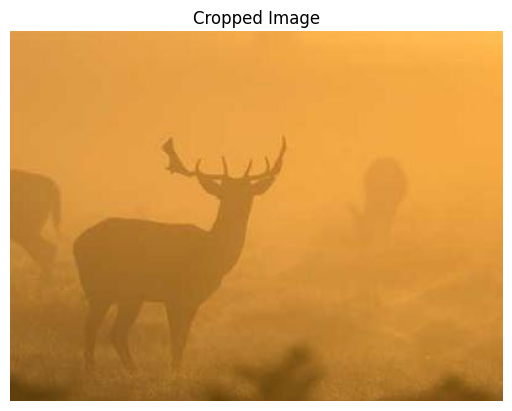

In [ ]:
# Crop a section from the center of the image
width, height = img.size
crop_area = (width/4, height/4, 3*width/4, 3*height/4)
cropped_img = img.crop(crop_area)

plt.imshow(cropped_img)
plt.title("Cropped Image")
plt.axis('off')
plt.show()

##### **c. Rotating**

The `.rotate()` method allows you to rotate the image by a specified angle.

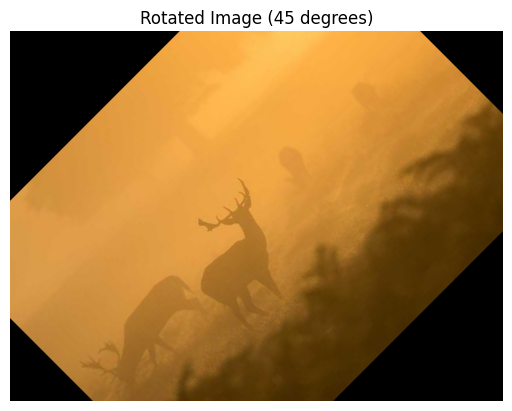

In [ ]:
# Rotate the image by 45 degrees
rotated_img = img.rotate(45)

plt.imshow(rotated_img)
plt.title("Rotated Image (45 degrees)")
plt.axis('off')
plt.show()

#### **6. Color Space Conversions & Filters**

You can easily convert an image to different color modes (e.g., grayscale) or apply built-in filters.

##### **a. Converting to Grayscale**

This converts the 3-channel RGB image into a single-channel grayscale image.

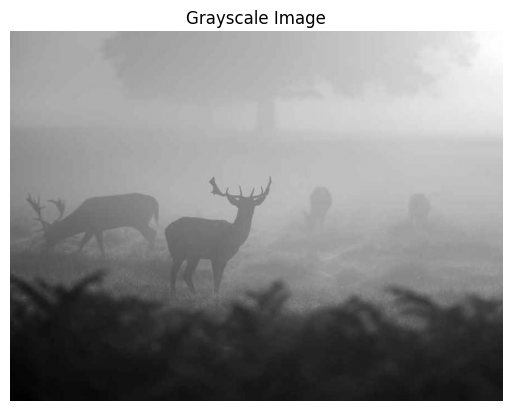

Shape of grayscale array: (600, 800)


In [ ]:
# Convert the image to grayscale
grayscale_img = img.convert('L')

# Display the grayscale image
plt.imshow(grayscale_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Notice the shape of the NumPy array is now 2D
print(f"Shape of grayscale array: {np.array(grayscale_img).shape}")

##### **b. Applying a Blur Filter**

`Pillow` has a set of `ImageFilter` methods for applying simple effects.

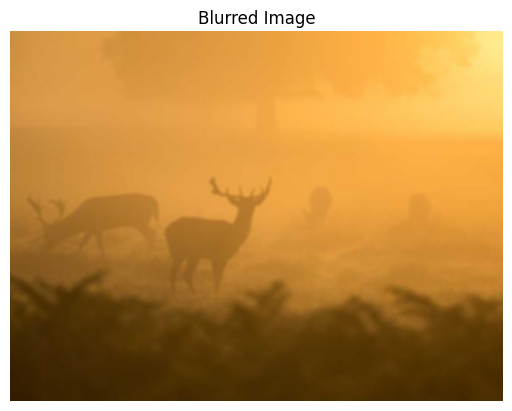

In [ ]:
from PIL import ImageFilter

# Apply a blur filter
blurred_img = img.filter(ImageFilter.BLUR)

plt.imshow(blurred_img)
plt.title("Blurred Image")
plt.axis('off')
plt.show()

#### **7. Saving an Image**

Finally, you can save your manipulated images to a file.

In [ ]:
# Save the cropped image to your Google Colab session's filesystem
cropped_img.save("cropped_image.png")

print("Image saved as 'cropped_image.png'. You can view it in the 'Files' tab on the left.")

Image saved as 'cropped_image.png'. You can view it in the 'Files' tab on the left.
